In [1]:
#use the cifar architecture sample from udacity
#try resnet & compare performance measures
#research the best architecture & compare performance measures
#implement the architecture

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Deep Learning Libraries
from tensorflow.keras import datasets, layers, models
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def accuracy_loss_plot(history):
    plt.Figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()
    plt.Figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()

In [1]:
data = np.load('fashion_mnist_dataset_train.npy', allow_pickle=True).item()

NameError: name 'np' is not defined

In [ ]:
data

In [ ]:
data['features'][0][6]

In [ ]:
data['features'].shape

In [ ]:
data['features'][0][6].shape

In [ ]:
data['target']

In [ ]:
data['target'].shape

In [ ]:
s = pd.Series(data['target'])
target = s.replace([1, 2, 3, 4, 5], [0, 1, 2, 3, 4])
target = target.to_numpy()
target

In [ ]:
target.shape

In [13]:
from sklearn.model_selection import train_test_split
# Splitting the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(data['features'], target, test_size=0.2, random_state=275)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=275)

In [14]:
X_train.shape

(48000, 28, 28)

In [15]:
X_val.shape

(6000, 28, 28)

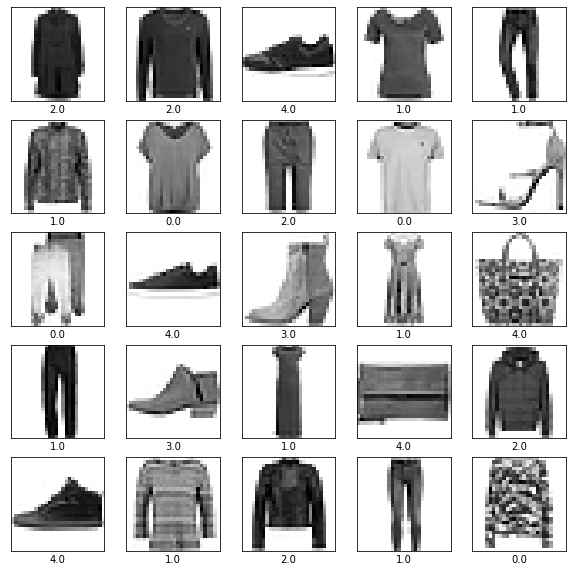

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [17]:
#plot the label distribution
import pandas as pd
df_label = pd.DataFrame(data['target'])

In [18]:
df_label.head()

,0
0,5.0
1,2.0
2,1.0
3,2.0
4,1.0


In [19]:
df_label.value_counts()

2.0    12019
3.0    12011
4.0    11992
1.0    11989
5.0    11989
dtype: int64

Data is almost evenly distributed among the labels

In [20]:
#output softmax layer should have 5 outputs
# Building a ConvNet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          3

In [22]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_val = X_val.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_val, y_val), batch_size=128)

Train on 48000 samples, validate on 6000 samples
Epoch 1/20
48000/48000 [==============================] - 152s 3ms/sample - loss: 1.1359 - accuracy: 0.7662 - val_loss: 1.3876 - val_accuracy: 0.5005
Epoch 2/20
48000/48000 [==============================] - 150s 3ms/sample - loss: 1.0790 - accuracy: 0.8244 - val_loss: 1.1023 - val_accuracy: 0.8007
Epoch 3/20
48000/48000 [==============================] - 151s 3ms/sample - loss: 1.0654 - accuracy: 0.8388 - val_loss: 1.1409 - val_accuracy: 0.7617
Epoch 4/20
48000/48000 [==============================] - 150s 3ms/sample - loss: 1.0553 - accuracy: 0.8490 - val_loss: 1.0795 - val_accuracy: 0.8237
Epoch 5/20
48000/48000 [==============================] - 148s 3ms/sample - loss: 1.0516 - accuracy: 0.8521 - val_loss: 1.0569 - val_accuracy: 0.8465
Epoch 6/20
48000/48000 [==============================] - 147s 3ms/sample - loss: 1.0420 - accuracy: 0.8615 - val_loss: 1.0581 - val_accuracy: 0.8460
Epoch 7/20
48000/48000 [===========================

### Effect of number of Epochs for Model

|Number of Epochs| Training Accuracy | Test Accuracy |
| --- | --- |-- |
|   10 | 87% |84%|
|   20 | 88% | 86%|
|   50 | |
|   100 | ||

In [24]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

6000/1 - 8s - loss: 1.0504 - accuracy: 0.8615
0.8615


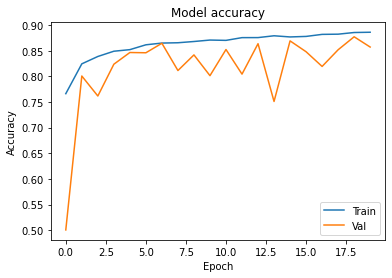

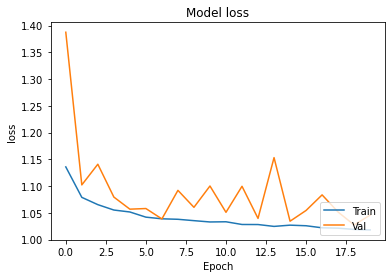

In [25]:
accuracy_loss_plot(history)

In [26]:
plot_model(model, show_shapes=True, rankdir="TD")

TypeError: 'InputLayer' object is not iterable

In [27]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [28]:
datagen.fit(X_train)

### Data Augmentation

Should we augment validation

#### Types of Augmentation
1. Rotation
2. Zoom
3. Shear
4. Flip

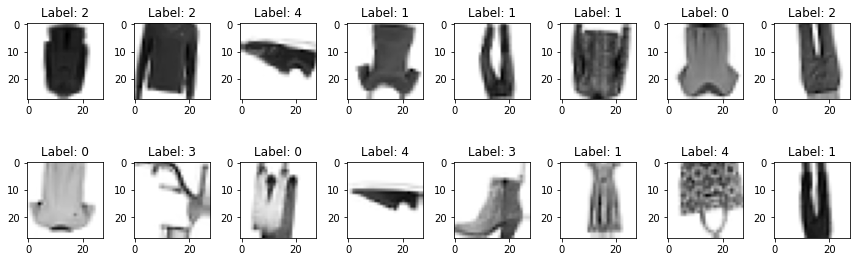

CPU times: user 766 ms, sys: 69.8 ms, total: 836 ms
Wall time: 839 ms


In [29]:
%%time
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot after
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train,y_train,batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

In [33]:
%%time
batch_size = 128
epochs = 20
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

# Fit the Model
history = model.fit(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (X_val, y_val), verbose=2, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Train for 375 steps, validate on 6000 samples
Epoch 1/20
375/375 - 158s - loss: 1.1470 - accuracy: 0.7553 - val_loss: 1.0433 - val_accuracy: 0.8608
Epoch 2/20
375/375 - 164s - loss: 1.1190 - accuracy: 0.7840 - val_loss: 1.0681 - val_accuracy: 0.8350
Epoch 3/20
375/375 - 156s - loss: 1.1116 - accuracy: 0.7909 - val_loss: 1.0657 - val_accuracy: 0.8388
Epoch 4/20
375/375 - 156s - loss: 1.1039 - accuracy: 0.7982 - val_loss: 1.0672 - val_accuracy: 0.8360
Epoch 5/20
375/375 - 161s - loss: 1.0986 - accuracy: 0.8044 - val_loss: 1.0599 - val_accuracy: 0.8435
Epoch 6/20
375/375 - 158s - loss: 1.0951 - accuracy: 0.8079 - val_loss: 1.0471 - val_accuracy: 0.8565
Epoch 7/20
375/375 - 158s - loss: 1.0881 - accuracy: 0.8148 - val_loss: 1.0512 - val_accuracy: 0.8530
Epoch 8/20
375/375 - 158s - loss: 1.0848 - accuracy: 0.8185 - val_loss: 1.0710 - val_accuracy: 0.8337
Epoch 9/20
375/375 - 161s - loss: 1.0821 - accuracy: 0.8216 - val_loss: 1.0497 - val_accuracy: 0.8545
Epoch 10/20
375/375 - 159s - loss: 1

In [34]:
%%time
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

6000/1 - 8s - loss: 1.0007 - accuracy: 0.8707
0.8706667
CPU times: user 14.6 s, sys: 32.6 s, total: 47.2 s
Wall time: 7.83 s


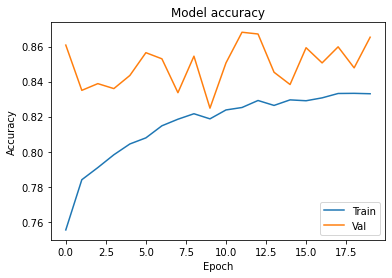

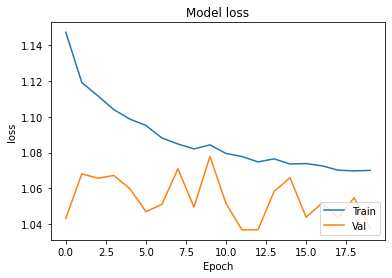

In [35]:
accuracy_loss_plot(history)

In [36]:
#plot all architectures and write references
#compare accuracies
#write about choice of all hyperparameters - no of epochs etc
#turn the models into classes

In [42]:
%%time
#Model 2 definition 
#output softmax layer should have 5 outputs
# Building a ConvNet
batch_size=128
epochs=10

model_brief=models.Sequential()
model_brief.add(layers.Conv2D(32, (3,3) , padding='same',activation='relu', input_shape=(28,28,1)))
model_brief.add(layers.BatchNormalization())
model_brief.add(layers.MaxPooling2D(pool_size=(2,2)))

model_brief.add(layers.Flatten())
model_brief.add(layers.Dense(128, activation='relu'))
model_brief.add(layers.Dense(5, activation='softmax'))

CPU times: user 180 ms, sys: 2.84 ms, total: 182 ms
Wall time: 96.4 ms


In [43]:
model_brief.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 804,037
Trainable params: 803,973
Non-trainable params: 64
_______________________________________________

In [44]:
model_brief.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
history = model_brief.fit(X_train, y_train, epochs=80, 
                    validation_data=(X_val, y_val), batch_size=128)

Train on 48000 samples, validate on 6000 samples
Epoch 1/80
48000/48000 [==============================] - 63s 1ms/sample - loss: 0.9986 - accuracy: 0.9059 - val_loss: 1.0217 - val_accuracy: 0.8828
Epoch 2/80
48000/48000 [==============================] - 63s 1ms/sample - loss: 0.9952 - accuracy: 0.9088 - val_loss: 1.0302 - val_accuracy: 0.8743
Epoch 3/80
48000/48000 [==============================] - 63s 1ms/sample - loss: 0.9937 - accuracy: 0.9107 - val_loss: 1.0371 - val_accuracy: 0.8660
Epoch 4/80
48000/48000 [==============================] - 64s 1ms/sample - loss: 0.9925 - accuracy: 0.9119 - val_loss: 1.0351 - val_accuracy: 0.8692
Epoch 5/80
48000/48000 [==============================] - 63s 1ms/sample - loss: 0.9907 - accuracy: 0.9135 - val_loss: 1.0675 - val_accuracy: 0.8367
Epoch 6/80
48000/48000 [==============================] - 63s 1ms/sample - loss: 0.9913 - accuracy: 0.9134 - val_loss: 1.0266 - val_accuracy: 0.8780
Epoch 7/80
48000/48000 [==============================] -

In [49]:
%%time
test_loss, test_acc = model_brief.evaluate(X_test,  y_test, verbose=2)
print("Test of accuracy of brief model", test_acc)

6000/1 - 5s - loss: 1.0552 - accuracy: 0.8743
Test of accuracy of brief model 0.8743333
CPU times: user 8.81 s, sys: 20.1 s, total: 28.9 s
Wall time: 5.08 s


### Effect of number of Epochs for Brief Model

|Number of Epochs| Training Accuracy | Test Accuracy |
| --- | --- |-- |
|   10 |  ||
|   20 |  | |
|   50 | |
|   80 |93% |87%|
|   100 | ||

In [ ]:
#model brief with augmented data
# Fit the Model
history = model.fit(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = 80, 
                              validation_data = (X_val, y_val), verbose=2, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Train for 375 steps, validate on 6000 samples
Epoch 1/80
375/375 - 156s - loss: 1.0871 - accuracy: 0.8161 - val_loss: 1.0515 - val_accuracy: 0.8522
Epoch 2/80
375/375 - 156s - loss: 1.0824 - accuracy: 0.8213 - val_loss: 1.0539 - val_accuracy: 0.8495
Epoch 3/80
375/375 - 159s - loss: 1.0791 - accuracy: 0.8236 - val_loss: 1.0442 - val_accuracy: 0.8593
Epoch 4/80
375/375 - 158s - loss: 1.0782 - accuracy: 0.8247 - val_loss: 1.0577 - val_accuracy: 0.8450
Epoch 5/80
375/375 - 157s - loss: 1.0742 - accuracy: 0.8289 - val_loss: 1.0828 - val_accuracy: 0.8215
Epoch 6/80
375/375 - 156s - loss: 1.0737 - accuracy: 0.8296 - val_loss: 1.0781 - val_accuracy: 0.8252
Epoch 7/80
375/375 - 156s - loss: 1.0712 - accuracy: 0.8323 - val_loss: 1.0768 - val_accuracy: 0.8260
Epoch 8/80
375/375 - 155s - loss: 1.0719 - accuracy: 0.8310 - val_loss: 1.0489 - val_accuracy: 0.8550
Epoch 9/80
375/375 - 157s - loss: 1.0681 - accuracy: 0.8353 - val_loss: 1.0598 - val_accuracy: 0.8438
Epoch 10/80
375/375 - 157s - loss: 1

In [ ]:
#test accuracy of model brief with augmented data
test_loss, test_acc = model_brief.evaluate(X_test,  y_test, verbose=2)
print("Test Accuracy of Brief Model with Augmented Data", test_acc)